In [1]:
from river.datasets.synth import FriedmanDrift
from river.preprocessing import MinMaxScaler
from river.metrics import MAE
from river.utils import Rolling
from river.tree import HoeffdingTreeRegressor
from deep_river.regression import Regressor
from torch import nn
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch

In [2]:
n_samples = 12500
change_points = (5000, 7500)
friedman = FriedmanDrift(drift_type="gra", position=change_points)


def test_train_eval(model, stream, update_interval=100):
    results = []
    steps = []
    step = 0
    metric = Rolling(MAE(), window_size=400)
    scaler = MinMaxScaler()
    for x, y in tqdm(list(stream)):
        scaler.learn_one(x)
        x = scaler.transform_one(x)
        y_pred = model.predict_one(x)
        model.learn_one(x, y)
        metric.update(y, y_pred)
        step += 1
        if step % update_interval == 0:
            results.append(metric.get())
            steps.append(step)
    return steps, results

In [3]:
class SimpleMLP(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.hidden = nn.Linear(n_features, 20)
        self.logit = nn.Linear(20, 1)

    def forward(self, x):
        h = self.hidden(x)
        h = torch.relu(h)
        return self.logit(h)


mlp = Regressor(
    SimpleMLP,
    loss_fn="l1",
    optimizer_fn="adam",
    lr=0.005,
    seed=42,
)
steps, results_mlp = test_train_eval(mlp, friedman.take(n_samples))

  0%|                                                                                                                                                                                                                    | 0/12500 [00:00<?, ?it/s]

  0%|                                                                                                                                                                                                          | 1/12500 [00:00<2:46:24,  1.25it/s]

  1%|██▌                                                                                                                                                                                                      | 163/12500 [00:00<00:50, 246.69it/s]

  3%|█████▏                                                                                                                                                                                                   | 326/12500 [00:00<00:24, 492.73it/s]

  4%|███████▊                                                                                                                                                                                                 | 486/12500 [00:01<00:16, 716.90it/s]

  5%|██████████▌                                                                                                                                                                                              | 657/12500 [00:01<00:12, 938.95it/s]

  7%|█████████████▏                                                                                                                                                                                          | 825/12500 [00:01<00:10, 1118.06it/s]

  8%|███████████████▉                                                                                                                                                                                        | 995/12500 [00:01<00:09, 1266.62it/s]

  9%|██████████████████▍                                                                                                                                                                                    | 1156/12500 [00:01<00:08, 1343.28it/s]

 11%|████████████████████▉                                                                                                                                                                                  | 1317/12500 [00:01<00:07, 1414.60it/s]

 12%|███████████████████████▌                                                                                                                                                                               | 1477/12500 [00:01<00:07, 1461.69it/s]

 13%|██████████████████████████                                                                                                                                                                             | 1640/12500 [00:01<00:07, 1508.44it/s]

 14%|████████████████████████████▊                                                                                                                                                                          | 1809/12500 [00:01<00:06, 1558.80it/s]

 16%|███████████████████████████████▍                                                                                                                                                                       | 1972/12500 [00:02<00:06, 1566.31it/s]

 17%|█████████████████████████████████▉                                                                                                                                                                     | 2135/12500 [00:02<00:06, 1583.68it/s]

 18%|████████████████████████████████████▋                                                                                                                                                                  | 2307/12500 [00:02<00:06, 1623.08it/s]

 20%|███████████████████████████████████████▎                                                                                                                                                               | 2472/12500 [00:02<00:06, 1593.57it/s]

 21%|█████████████████████████████████████████▉                                                                                                                                                             | 2634/12500 [00:02<00:06, 1594.81it/s]

 22%|████████████████████████████████████████████▍                                                                                                                                                          | 2795/12500 [00:02<00:06, 1564.37it/s]

 24%|███████████████████████████████████████████████                                                                                                                                                        | 2958/12500 [00:02<00:06, 1582.26it/s]

 25%|█████████████████████████████████████████████████▋                                                                                                                                                     | 3123/12500 [00:02<00:05, 1600.04it/s]

 26%|████████████████████████████████████████████████████▎                                                                                                                                                  | 3286/12500 [00:02<00:05, 1607.61it/s]

 28%|██████████████████████████████████████████████████████▉                                                                                                                                                | 3448/12500 [00:02<00:06, 1493.76it/s]

 29%|█████████████████████████████████████████████████████████▎                                                                                                                                             | 3600/12500 [00:03<00:06, 1483.09it/s]

 30%|███████████████████████████████████████████████████████████▊                                                                                                                                           | 3758/12500 [00:03<00:05, 1507.02it/s]

 31%|██████████████████████████████████████████████████████████████▍                                                                                                                                        | 3922/12500 [00:03<00:05, 1545.28it/s]

 33%|█████████████████████████████████████████████████████████████████▏                                                                                                                                     | 4092/12500 [00:03<00:05, 1589.92it/s]

 34%|███████████████████████████████████████████████████████████████████▊                                                                                                                                   | 4256/12500 [00:03<00:05, 1604.31it/s]

 35%|██████████████████████████████████████████████████████████████████████▎                                                                                                                                | 4417/12500 [00:03<00:05, 1510.94it/s]

 37%|████████████████████████████████████████████████████████████████████████▊                                                                                                                              | 4570/12500 [00:03<00:05, 1472.05it/s]

 38%|███████████████████████████████████████████████████████████████████████████▏                                                                                                                           | 4721/12500 [00:03<00:05, 1482.54it/s]

 39%|█████████████████████████████████████████████████████████████████████████████▊                                                                                                                         | 4884/12500 [00:03<00:04, 1523.36it/s]

 40%|████████████████████████████████████████████████████████████████████████████████▎                                                                                                                      | 5046/12500 [00:03<00:04, 1551.31it/s]

 42%|██████████████████████████████████████████████████████████████████████████████████▊                                                                                                                    | 5202/12500 [00:04<00:04, 1549.92it/s]

 43%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                 | 5369/12500 [00:04<00:04, 1585.11it/s]

 44%|████████████████████████████████████████████████████████████████████████████████████████                                                                                                               | 5528/12500 [00:04<00:04, 1504.34it/s]

 45%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                            | 5682/12500 [00:04<00:04, 1512.25it/s]

 47%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                          | 5834/12500 [00:04<00:04, 1475.55it/s]

 48%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                       | 5988/12500 [00:04<00:04, 1493.96it/s]

 49%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                     | 6151/12500 [00:04<00:04, 1532.24it/s]

 51%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                  | 6316/12500 [00:04<00:03, 1564.55it/s]

 52%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                | 6473/12500 [00:04<00:03, 1561.24it/s]

 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                             | 6630/12500 [00:05<00:03, 1484.29it/s]

 54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 6780/12500 [00:05<00:03, 1443.33it/s]

 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 6926/12500 [00:05<00:03, 1443.52it/s]

 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 7089/12500 [00:05<00:03, 1496.47it/s]

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 7252/12500 [00:05<00:03, 1533.14it/s]

 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 7406/12500 [00:05<00:03, 1477.03it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 7555/12500 [00:05<00:03, 1452.80it/s]

 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 7707/12500 [00:05<00:03, 1470.53it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 7866/12500 [00:05<00:03, 1503.99it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 8027/12500 [00:05<00:02, 1533.79it/s]

 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 8181/12500 [00:06<00:02, 1520.31it/s]

 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 8337/12500 [00:06<00:02, 1530.76it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 8491/12500 [00:06<00:02, 1516.54it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 8651/12500 [00:06<00:02, 1538.63it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 8805/12500 [00:06<00:02, 1518.26it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 8957/12500 [00:06<00:02, 1498.86it/s]

 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 9116/12500 [00:06<00:02, 1525.22it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 9275/12500 [00:06<00:02, 1543.59it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 9430/12500 [00:06<00:02, 1506.68it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 9581/12500 [00:07<00:02, 1456.25it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 9728/12500 [00:07<00:01, 1431.44it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 9872/12500 [00:07<00:01, 1420.49it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 10024/12500 [00:07<00:01, 1448.90it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 10184/12500 [00:07<00:01, 1492.17it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 10342/12500 [00:07<00:01, 1517.91it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 10495/12500 [00:07<00:01, 1510.11it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 10654/12500 [00:07<00:01, 1532.15it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 10819/12500 [00:07<00:01, 1565.76it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 10979/12500 [00:07<00:00, 1573.23it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 11137/12500 [00:08<00:00, 1566.08it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 11294/12500 [00:08<00:00, 1555.96it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 11462/12500 [00:08<00:00, 1589.65it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 11622/12500 [00:08<00:00, 1568.06it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 11780/12500 [00:08<00:00, 1571.03it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 11938/12500 [00:08<00:00, 1556.43it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 12094/12500 [00:08<00:00, 1540.50it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 12260/12500 [00:08<00:00, 1574.65it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 12426/12500 [00:08<00:00, 1599.39it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12500/12500 [00:08<00:00, 1403.86it/s]

In [4]:
tree = HoeffdingTreeRegressor()
steps, results_tree = test_train_eval(tree, friedman.take(n_samples))

  0%|                                                                                                                                                                                                                    | 0/12500 [00:00<?, ?it/s]

  1%|█▎                                                                                                                                                                                                        | 84/12500 [00:00<00:17, 718.31it/s]

  8%|████████████████▏                                                                                                                                                                                      | 1017/12500 [00:00<00:02, 5453.15it/s]

 18%|████████████████████████████████████▍                                                                                                                                                                  | 2290/12500 [00:00<00:01, 8652.45it/s]

 27%|██████████████████████████████████████████████████████▌                                                                                                                                                | 3426/12500 [00:00<00:00, 9695.48it/s]

 37%|████████████████████████████████████████████████████████████████████████▊                                                                                                                             | 4598/12500 [00:00<00:00, 10412.98it/s]

 46%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                           | 5725/12500 [00:00<00:00, 10701.10it/s]

 55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                         | 6841/12500 [00:00<00:00, 10848.36it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 7933/12500 [00:00<00:00, 10521.95it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 9194/12500 [00:00<00:00, 11156.64it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 10454/12500 [00:01<00:00, 11592.78it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 11619/12500 [00:01<00:00, 10230.91it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12500/12500 [00:01<00:00, 10004.99it/s]

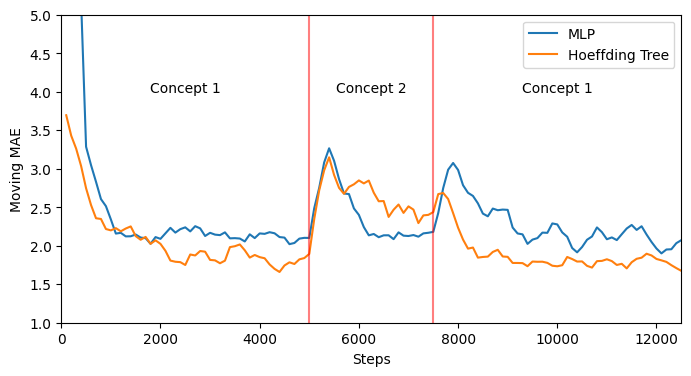

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(steps, results_mlp, label="MLP")
ax.plot(steps, results_tree, label="Hoeffding Tree")
for change_point in change_points:
    ax.axvline(change_point, color="red", alpha=0.5)
ax.set_xlim(0, n_samples)
ax.set_ylim(1, 5)
plt.text(
    int(change_points[0] / 2), 4, "Concept 1", horizontalalignment="center"
)
plt.text(
    int(change_points[0] + (change_points[1] - change_points[0]) / 2),
    4,
    "Concept 2",
    horizontalalignment="center",
)
plt.text(
    int(change_points[1] + (n_samples - change_points[1]) / 2),
    4,
    "Concept 1",
    horizontalalignment="center",
)

ax.set_xlabel("Steps")
ax.set_ylabel("Moving MAE")
ax.legend()